In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from typing import List
from dataclasses import dataclass
import random


In [3]:
class _Config:
    formatofyh: str = ""
    AltMax: int = 1.0
    AltMin: int = -1.0
    PlotType: str = "3d"
    Pasos: int = 5
    Cuadricula: int = 2 ** Pasos
        
config = _Config()

In [4]:
def Promedio(numbers: List[float]) -> float:
    return float(sum(numbers)) / float(len(numbers))

In [5]:
def FloatAzar(AltMin: int, AltMax: int) -> float:
    return random.uniform(AltMin, AltMax)

In [6]:
AltMax = config.AltMax
AltMin = config.AltMin

In [7]:
##Función inicial, crea las 4 esquinas del área dónde se simulará 

def CuadriculaFSemilla(Cuadricula):
    Altura_Mapa = np.zeros((Cuadricula, Cuadricula), dtype=float)
    Altura_Mapa[0,0] = FloatAzar(AltMin, AltMax)
    Altura_Mapa[0, Cuadricula - 1] = FloatAzar(AltMin, AltMax)
    Altura_Mapa[Cuadricula - 1, 0] = FloatAzar(AltMin, AltMax)
    Altura_Mapa[Cuadricula - 1, Cuadricula - 1] = FloatAzar(AltMin, AltMax)
    return Altura_Mapa

In [13]:
def f_plotting(Altura_Mapa, max_index, PlotType):
    """Function plots either 2D or 3D heatmap."""
    timestr = time.strftime("%Y%m%d-%H%M%S")

    if PlotType == "3d":
        x_index = [i for i in range(0, max_index + 1)]
        y_index = [i for i in range(0, max_index + 1)]
        x_vals, y_vals = np.meshgrid(x_index, y_index)
        fig = plt.figure()
        p2 = fig.add_subplot(111, projection="3d")
        p2.set_title("Diamond Square 3D Surface Plot")
        p2.set_aspect("auto")
        p2.plot_surface(x_vals, y_vals, Altura_Mapa, rstride=1, cstride=1, cmap=cm.jet)
        plt.savefig("3D_dS%s.png" % timestr, bbox_inches="tight")
        plt.show()
    else:
        fig = plt.figure()
        p3 = fig.add_subplot(111)
        p3.set_title("Diamond Square 2D Terrain Heatmap")
        p3.set_aspect("equal")
        plt.imshow(height_map, origin="lower", cmap=cm.jet)
        plt.savefig("2D_dS%s.png" % timestr, bbox_inches="tight")
        plt.show()


def f_square_step(Altura_Mapa, grid_split, shape_length, lo_rnd):
    """Function computes square step (reference points form square)."""
    for i in range(grid_split):
        for j in range(grid_split):
            # REDEFINE STEP SIZE INCREMENTER & SHAPE INDICES.
            half_v_grid_size = shape_length // 2
            i_min = i * shape_length
            i_max = (i + 1) * shape_length
            j_min = j * shape_length
            j_max = (j + 1) * shape_length
            i_mid = i_min + half_v_grid_size
            j_mid = j_min + half_v_grid_size
            # ASSIGN REFERENCE POINTS & DO SQUARE STEP.
            north_west = Altura_Mapa[i_min, j_min]
            north_east = Altura_Mapa[i_min, j_max]
            south_west = Altura_Mapa[i_max, j_min]
            south_east = Altura_Mapa[i_max, j_max]
            Altura_Mapa[i_mid, j_mid] = Promedio(
                [north_west, north_east, south_east, south_west]
            ) + FloatAzar(-lo_rnd, lo_rnd)
    return Altura_Mapa


def f_diamond_step(Altura_Mapa, grid_split, shape_length, lo_rnd, max_index):
    """Function computes diamond step (reference points form diamond)."""
    for i in range(grid_split):
        for j in range(grid_split):
            # REDEFINE STEP SIZE INCREMENTER & SHAPE INDICES.
            half_v_grid_size = shape_length // 2
            i_min = i * shape_length
            i_max = (i + 1) * shape_length
            j_min = j * shape_length
            j_max = (j + 1) * shape_length
            i_mid = i_min + half_v_grid_size
            j_mid = j_min + half_v_grid_size
            center = Altura_Mapa[i_mid, j_mid]
            north_west = Altura_Mapa[i_min, j_min]
            north_east = Altura_Mapa[i_min, j_max]
            south_west = Altura_Mapa[i_max, j_min]
            south_east = Altura_Mapa[i_max, j_max]
            # DO DIAMOND STEP.
            # Top Diamond - wraps if at edge.
            if i_min == 0:
                temp = max_index - half_v_grid_size
            else:
                temp = i_min - half_v_grid_size
            # If Top value exists then skip else compute.
            if Altura_Mapa[i_min, j_mid] == 0:
                Altura_Mapa[i_min, j_mid] = Promedio(
                    [center, north_west, north_east, Altura_Mapa[temp, j_mid]]
                ) + FloatAzar(-lo_rnd, lo_rnd)

            # Left Diamond - wraps if at edge.
            if j_min == 0:
                temp = max_index - half_v_grid_size
            else:
                temp = j_min - half_v_grid_size
            # If Left value exists then skip else compute.
            if Altura_Mapa[i_mid, j_min] == 0:
                Altura_Mapa[i_mid, j_min] = Promedio(
                    [center, north_west, south_west, Altura_Mapa[i_mid, temp]]
                ) + FloatAzar(-lo_rnd, lo_rnd)

            # Right Diamond - wraps if at edge.
            if j_max == max_index:
                temp = 0 + half_v_grid_size
            else:
                temp = j_max + half_v_grid_size
            Altura_Mapa[i_mid, j_max] = Promedio(
                [center, north_east, south_east, Altura_Mapa[i_mid, temp]]
            ) + FloatAzar(-lo_rnd, lo_rnd)

            # Bottom Diamond - wraps at edge.
            if i_max == max_index:
                temp = 0 + half_v_grid_size
            else:
                temp = i_max + half_v_grid_size
            Altura_Mapa[i_max, j_mid] = Promedio(
                [center, south_west, south_east, Altura_Mapa[temp, j_mid]]
            ) + FloatAzar(-lo_rnd, lo_rnd)
    return Altura_Mapa


def f_dsmain(Altura_Mapa, steps, max_index, max_rnd):
    """Main looping function.  Calls methods in proper step."""
    # Set iterators
    shape_length = len(Altura_Mapa) - 1
    grid_split = 1  # Number of shapes is this number squared.
    for level in range(steps):
        lo_rnd = max_rnd / (level + 1)
        f_square_step(Altura_Mapa, grid_split, shape_length, lo_rnd)
        f_diamond_step(Altura_Mapa, grid_split, shape_length, lo_rnd, max_index)
        # Increment iterators for next loop. Use floor divide to force int.
        shape_length //= 2
        grid_split *= 2
    return Altura_Mapa

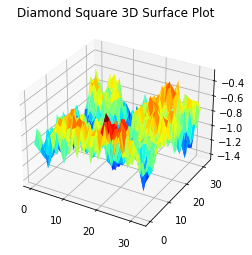

In [14]:
if __name__ == "__main__":
    # Inputs here. Recommend ds_steps = 3 up to 11 for 2d and 3 - 5 for 3d.
    ds_steps = config.Pasos  # Number of levels. Grid points = ((ds_steps^2)+1)^2.
    max_rnd = config.AltMax  # Min & Max random value.
    plot_type = config.PlotType  # "3d" for 3d.  Makes 2d plot for any other input.
    # Inputs end.
    max_index = config.Cuadricula

    seeded_map = CuadriculaFSemilla(2**ds_steps + 1)
    Final_height_map = f_dsmain(seeded_map, ds_steps, max_index, max_rnd)  # Calcs.
    f_plotting(Final_height_map, max_index, plot_type)  # Plotting.